In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [93]:
dat = pd.read_csv('train.csv')

In [94]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
dat.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [96]:
type(dat[dat.columns[0]])

pandas.core.series.Series

In [29]:
dat._get_numeric_data().columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch',
       u'Fare'],
      dtype='object')

In [30]:
dat.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [97]:
def null_count(x):
    return sum(x.isnull())

In [98]:
num_col = dat._get_numeric_data().columns

In [99]:
num_col

Index([u'PassengerId', u'Survived', u'Pclass', u'Age', u'SibSp', u'Parch',
       u'Fare'],
      dtype='object')

In [100]:
dat.apply(null_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
grp = dat.pivot_table(values=['Age'], index=['Pclass','Sex'],aggfunc=np.mean)

In [102]:
grp.round(0)

Age
Pclass Sex         
1      female  35.0
       male    41.0
2      female  29.0
       male    31.0
3      female  22.0
       male    27.0

In [103]:
for i,row in dat.loc[dat['Age'].isnull(),:].iterrows():
    ind = tuple([row['Pclass'],row['Sex']])
    dat.loc[i,'Age'] = grp.loc[ind].values[0]

In [42]:
dat.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [43]:
dat.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
dat['Embarked'].isnull().any()

True

In [50]:
dat.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


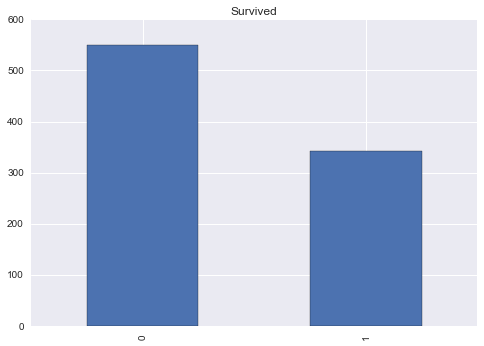

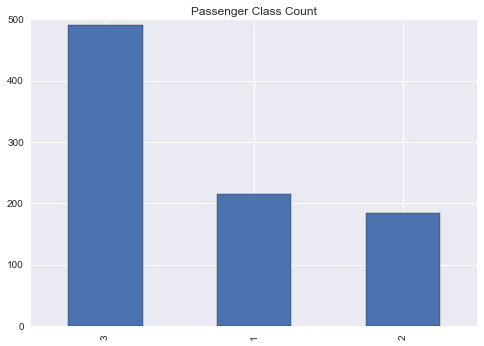

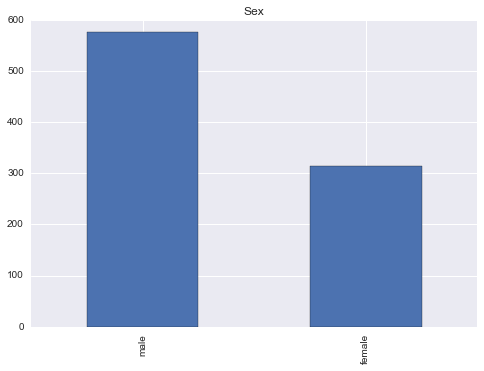

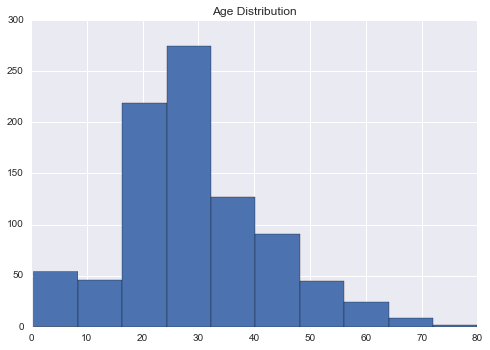

In [83]:
dat['Survived'].value_counts().plot(kind='bar', title='Survived')
plt.show()

dat['Pclass'].value_counts().plot(kind='bar',title='Passenger Class Count')
plt.show()

dat['Sex'].value_counts().plot(kind='bar',title='Sex')
plt.show()

plt.hist(dat['Age'])
plt.title('Age Distribution')
plt.show()

In [104]:
dat['Embarked'].isnull().any()

True

In [105]:
dat['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [112]:
dat['Embarked'].fillna('S',inplace=True)

In [114]:
dat['Embarked'].isnull().any()

False

In [119]:
dat=dat.drop(['Cabin'],axis=1)

In [120]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [122]:
dat=dat.drop(['Name','Ticket'],axis=1)

In [123]:
dat.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [126]:
pcls = pd.crosstab(dat['Pclass'],dat['Survived'])
pcls

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [128]:
pcls=pcls.div(pcls.sum(1).astype(float),axis=0)

In [129]:
pcls

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


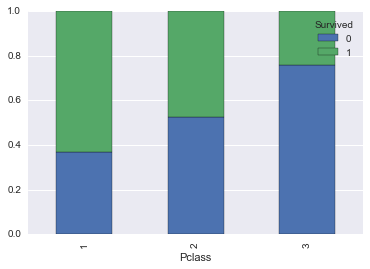

In [131]:
pcls.plot(kind='bar',stacked=True)

In [132]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
dat['Sex'] = number.fit_transform(dat['Sex'].astype('str'))

In [133]:
dat.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [135]:
dat['Embarked'] = number.fit_transform(dat['Embarked'].astype('str'))

In [136]:
dat.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=max_age / bin_size, 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

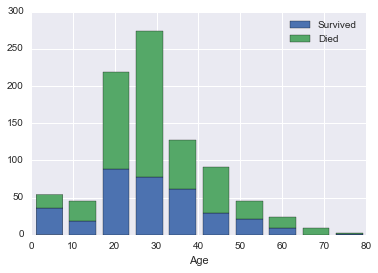

In [141]:
age1 = dat[dat['Survived']==1]['Age']
age2 = dat[dat['Survived']==0]['Age']
max_age = max(dat['Age'])
plt.hist([age1,age2], stacked=True)
plt.legend(('Survived','Died'))
plt.xlabel('Age')

In [151]:
dat['Family']=dat['SibSp']+dat['Parch']
dat=dat.drop(['PassengerId','SibSp','Parch'],axis=1)
dat.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22,7.2500,2,1
1,1,1,0,38,71.2833,0,1
2,1,3,0,26,7.9250,2,0
3,1,1,0,35,53.1000,2,1
4,0,3,1,35,8.0500,2,0


In [147]:
dat['Age']=dat['Age'].astype(int)

In [158]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

In [159]:
x = dat[dat.columns[1:]]
y = dat['Survived']

In [160]:
clf = clf.fit(x,y)
clf.score(x,y)

0.97418630751964086

In [161]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.20,random_state=42)

In [162]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.83


In [163]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.86      0.85      0.85       105
    Survived       0.79      0.80      0.79        74

 avg / total       0.83      0.83      0.83       179

